# 20143567 Lee Hee Sang
# Read image
# Apply K-means algorithm to the image when k=5
# Visualize input image, result image and the energy curve.


(187, 250, 3)
[[ 55 122 201]
 [ 61 128 207]
 [ 61 126 206]
 ...
 [ 15   4   2]
 [ 12   0   0]
 [ 12   2   0]]


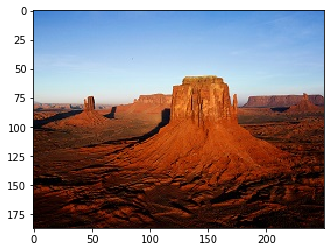

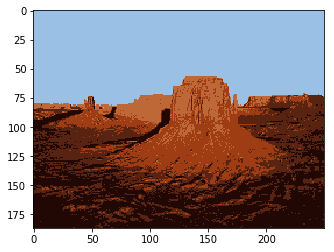

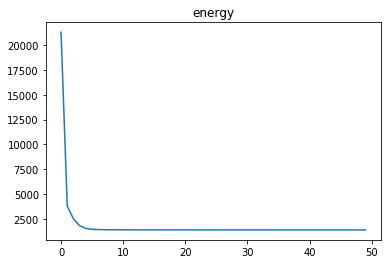

In [2]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

# Read image
im = pilimg.open( 'Desert.jpg' )

num_of_cluster = 5

# Fetch image pixel data to numpy array
pix = np.array(im)
image_size = pix.shape[0]*pix.shape[1]
print(pix.shape)
label = np.random.randint(num_of_cluster, size=(image_size))
cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
newpix = pix.copy()
newpix = newpix.reshape(image_size,3)
print(newpix)
energy_list=[]


for k in range(num_of_cluster):
    count = 0
    for i in range(image_size):
        if label[i] == k:
            count = count +1
            for j in range(3):
                cluster_sum[k][j]=cluster_sum[k][j]+newpix[i][j]
    if count == 0:
        continue
    for j in range(3):
        cluster_sum[k][j] = cluster_sum[k][j]/count

energy = 0

for k in range(num_of_cluster):
    for i in range(image_size):
        if label[i] == k:
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            energy = energy + sum
            
energy=energy/image_size
energy_list.append(energy)


newlabel = np.empty(image_size, dtype=int)

while True:
    
    for i in range(image_size):
        dis=[]
        for k in range(num_of_cluster):
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            dis.append(sum)
        newlabel[i]=dis.index(min(dis))
    
    new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
    
    for k in range(num_of_cluster):
        count = 0
        for i in range(image_size):
            if newlabel[i] == k:
                count = count+1
                for j in range(3):
                    new_cluster_sum[k][j]=new_cluster_sum[k][j]+newpix[i][j]
        if count == 0:
            continue
        for j in range(3):
            new_cluster_sum[k][j] = new_cluster_sum[k][j]/count
    
    energy=0
    
    for k in range(num_of_cluster):
        for i in range(image_size):
            if newlabel[i] == k:
                sum=0
                for j in range(3):
                    sum=sum+(new_cluster_sum[k][j]-newpix[i][j])**2
                energy=energy + sum
    
    energy=energy/image_size                
    energy_list.append(energy)
    
    
    
    if np.array_equal(new_cluster_sum,cluster_sum):
        cluster_sum=new_cluster_sum.copy()
        break
    else:
        cluster_sum=new_cluster_sum.copy()
                
for i in range(image_size):
    for k in range(num_of_cluster):
        if newlabel[i] == k:
            for j in range(3):
                newpix[i][j]=cluster_sum[k][j]
            
            

newpix = newpix.reshape(pix.shape[0],pix.shape[1],3)

plt.figure(1)
plt.imshow(pix)
plt.show()
plt.figure(2)
plt.imshow(newpix)
plt.show() 
plt.figure(3)
plt.title("energy")
plt.plot(energy_list)
plt.show()      


# Apply K-means algorithm to the image when k=10
# Visualize input image, result image and the energy curve.

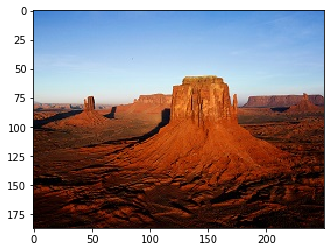

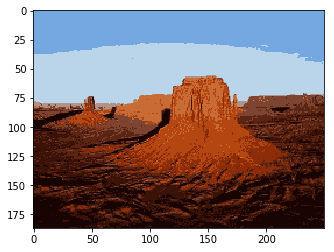

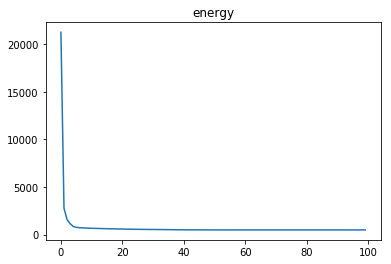

In [4]:
#
num_of_cluster = 10

pix = np.array(im)
image_size = pix.shape[0]*pix.shape[1]
label = np.random.randint(num_of_cluster, size=(image_size))
cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
newpix = pix.copy()
newpix = newpix.reshape(image_size,3)
energy_list=[]



for k in range(num_of_cluster):
    count = 0
    for i in range(image_size):
        if label[i] == k:
            count = count +1
            for j in range(3):
                cluster_sum[k][j]=cluster_sum[k][j]+newpix[i][j]
    if count == 0:
        continue
    for j in range(3):
        cluster_sum[k][j] = cluster_sum[k][j]/count

energy = 0

for k in range(num_of_cluster):
    for i in range(image_size):
        if label[i] == k:
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            energy = energy + sum
energy=energy/image_size
energy_list.append(energy)


newlabel = np.empty(image_size, dtype=int)

while True:
    
    for i in range(image_size):
        dis=[]
        for k in range(num_of_cluster):
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            dis.append(sum)
        newlabel[i]=dis.index(min(dis))
    
    new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
    
    for k in range(num_of_cluster):
        count = 0
        for i in range(image_size):
            if newlabel[i] == k:
                count = count+1
                for j in range(3):
                    new_cluster_sum[k][j]=new_cluster_sum[k][j]+newpix[i][j]
        if count == 0:
            continue
        for j in range(3):
            new_cluster_sum[k][j] = new_cluster_sum[k][j]/count
    
    energy=0
    
    for k in range(num_of_cluster):
        for i in range(image_size):
            if newlabel[i] == k:
                sum=0
                for j in range(3):
                    sum=sum+(new_cluster_sum[k][j]-newpix[i][j])**2
                energy=energy + sum
               
    energy=energy/image_size
    energy_list.append(energy)
    
    
    
    if np.array_equal(new_cluster_sum,cluster_sum):
        cluster_sum=new_cluster_sum.copy()
        break
    else:
        cluster_sum=new_cluster_sum.copy()
                
for i in range(image_size):
    for k in range(num_of_cluster):
        if newlabel[i] == k:
            for j in range(3):
                newpix[i][j]=cluster_sum[k][j]
            
            

newpix = newpix.reshape(pix.shape[0],pix.shape[1],3)

plt.figure(4)
plt.imshow(pix)
plt.show() 
plt.figure(5)
plt.imshow(newpix)
plt.show() 
plt.figure(6)
plt.title("energy")
plt.plot(energy_list)
plt.show()      


# Apply K-means algorithm to the image when k=15
# Visualize input image, result image and the energy curve.

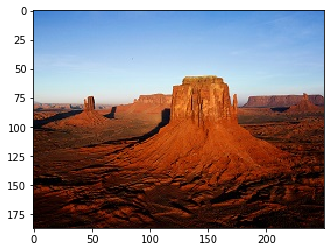

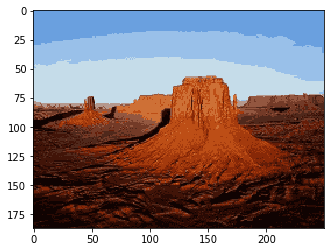

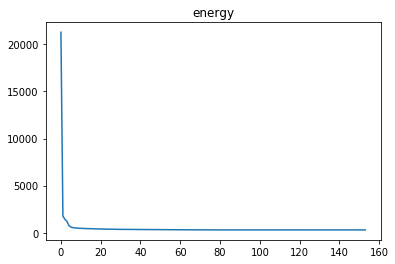

In [5]:
#
num_of_cluster = 15

pix = np.array(im)
image_size = pix.shape[0]*pix.shape[1]
label = np.random.randint(num_of_cluster, size=(image_size))
cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
newpix = pix.copy()
newpix = newpix.reshape(image_size,3)
energy_list=[]


for k in range(num_of_cluster):
    count = 0
    for i in range(image_size):
        if label[i] == k:
            count = count +1
            for j in range(3):
                cluster_sum[k][j]=cluster_sum[k][j]+newpix[i][j]
    if count == 0:
        continue
    for j in range(3):
        cluster_sum[k][j] = cluster_sum[k][j]/count

energy = 0

for k in range(num_of_cluster):
    for i in range(image_size):
        if label[i] == k:
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            energy = energy + sum
energy=energy/image_size
energy_list.append(energy)


newlabel = np.empty(image_size, dtype=int)

while True:
    
    for i in range(image_size):
        dis=[]
        for k in range(num_of_cluster):
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            dis.append(sum)
        newlabel[i]=dis.index(min(dis))
    
    new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
    
    for k in range(num_of_cluster):
        count = 0
        for i in range(image_size):
            if newlabel[i] == k:
                count = count+1
                for j in range(3):
                    new_cluster_sum[k][j]=new_cluster_sum[k][j]+newpix[i][j]
        if count == 0:
            continue
        for j in range(3):
            new_cluster_sum[k][j] = new_cluster_sum[k][j]/count
    
    energy=0
    
    for k in range(num_of_cluster):
        for i in range(image_size):
            if newlabel[i] == k:
                sum=0
                for j in range(3):
                    sum=sum+(new_cluster_sum[k][j]-newpix[i][j])**2
                energy=energy + sum
    energy=energy/image_size
    energy_list.append(energy)
    
    
    
    if np.array_equal(new_cluster_sum,cluster_sum):
        cluster_sum=new_cluster_sum.copy()
        break
    else:
        cluster_sum=new_cluster_sum.copy()
                
for i in range(image_size):
    for k in range(num_of_cluster):
        if newlabel[i] == k:
            for j in range(3):
                newpix[i][j]=cluster_sum[k][j]
            
            

newpix = newpix.reshape(pix.shape[0],pix.shape[1],3)

plt.figure(7)
plt.imshow(pix)
plt.show() 
plt.figure(8)
plt.imshow(newpix)
plt.show() 
plt.figure(9)
plt.title("energy")
plt.plot(energy_list)
plt.show()      

# Apply K-means algorithm to the image when k=20
# Visualize input image, result image and the energy curve.

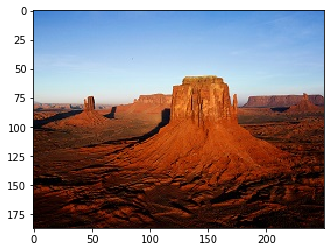

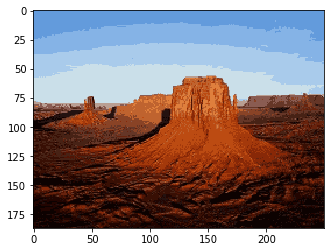

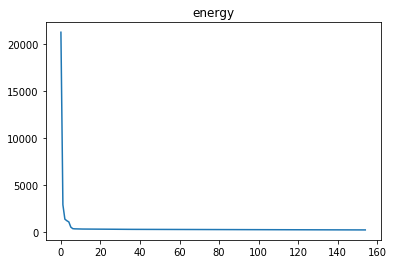

In [6]:
#
num_of_cluster = 20

pix = np.array(im)
image_size = pix.shape[0]*pix.shape[1]
label = np.random.randint(num_of_cluster, size=(image_size))
cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
newpix = pix.copy()
newpix = newpix.reshape(image_size,3)
energy_list=[]


for k in range(num_of_cluster):
    count = 0
    for i in range(image_size):
        if label[i] == k:
            count = count +1
            for j in range(3):
                cluster_sum[k][j]=cluster_sum[k][j]+newpix[i][j]
    if count == 0:
        continue
    for j in range(3):
        cluster_sum[k][j] = cluster_sum[k][j]/count

energy = 0

for k in range(num_of_cluster):
    for i in range(image_size):
        if label[i] == k:
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            energy = energy + sum
energy=energy/image_size
energy_list.append(energy)


newlabel = np.empty(image_size, dtype=int)

while True:
    
    for i in range(image_size):
        dis=[]
        for k in range(num_of_cluster):
            sum=0
            for j in range(3):
                sum=sum+(cluster_sum[k][j]-newpix[i][j])**2
            dis.append(sum)
        newlabel[i]=dis.index(min(dis))
    
    new_cluster_sum = np.zeros((num_of_cluster,3), dtype=float)
    
    for k in range(num_of_cluster):
        count = 0
        for i in range(image_size):
            if newlabel[i] == k:
                count = count+1
                for j in range(3):
                    new_cluster_sum[k][j]=new_cluster_sum[k][j]+newpix[i][j]
        if count == 0:
            continue
        for j in range(3):
            new_cluster_sum[k][j] = new_cluster_sum[k][j]/count
    
    energy=0
    
    for k in range(num_of_cluster):
        for i in range(image_size):
            if newlabel[i] == k:
                sum=0
                for j in range(3):
                    sum=sum+(new_cluster_sum[k][j]-newpix[i][j])**2
                energy=energy + sum
    energy=energy/image_size
    energy_list.append(energy)
   
    
    
    if np.array_equal(new_cluster_sum,cluster_sum):
        cluster_sum=new_cluster_sum.copy()
        break
    else:
        cluster_sum=new_cluster_sum.copy()
                
for i in range(image_size):
    for k in range(num_of_cluster):
        if newlabel[i] == k:
            for j in range(3):
                newpix[i][j]=cluster_sum[k][j]
            
            

newpix = newpix.reshape(pix.shape[0],pix.shape[1],3)

plt.figure(10)
plt.imshow(pix)
plt.show() 
plt.figure(11)
plt.imshow(newpix)
plt.show() 
plt.figure(12)
plt.title("energy")
plt.plot(energy_list)
plt.show()      